<a href="https://colab.research.google.com/github/26Sanya/Assignments-CiSc/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing modules and libraries**


In [47]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# **Reading the data**

In [48]:
df=pd.read_excel('/content/aspiring_minds_employability_outcomes_2015.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# Aspiring Mind Employment Outcome 2015 DataSet:
The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

# **Data Understanding and Cleaning**

##  High level statistics of the dataset:

In [49]:
df.shape

(3998, 39)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

ID is a primary key to this data, so we can use it as the index. No need of two unique identification ids

In [51]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [52]:
df['Unnamed: 0'].value_counts()

train    3998
Name: Unnamed: 0, dtype: int64

'Unnamed: 0' column has same value for all columns. It cannot provide information. We can discard it. 

In [53]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Analyzing Numeric Variables

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [55]:
print('The columns from Most to least variance:\n(Information gain decreases from top to bottom for non-categorical and non-standardized cols)')
pd.DataFrame(np.var(df)).sort_values(by=0,ascending= False)

The columns from Most to least variance:
(Information gain decreases from top to bottom for non-categorical and non-standardized cols)


,0
ID,1.318945e+11
Salary,4.524592e+10
CollegeCityID,2.305595e+07
CollegeID,2.305595e+07
ComputerProgramming,4.216034e+04
ComputerScience,3.071297e+04
ElectronicsAndSemicon,2.503402e+04
Quant,1.495412e+04
English,1.100965e+04
TelecomEngg,1.099137e+04


### Analyzing Non-Numeric variables

In [56]:
df.describe(exclude=['int64','float64'])

,DOJ,DOL,Designation,JobCity,Gender,DOB,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,81,67,419,339,2,1872,275,340,4,46,26
top,2014-07-01 00:00:00,present,software engineer,Bangalore,m,1991-01-01 00:00:00,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,199,1875,539,627,3041,11,1395,1400,3700,880,915
first,1991-06-01 00:00:00,NaN,NaN,NaN,NaN,1977-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,1997-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN


Categorical Variables as given from Data Description: <br>['Designation','JobCity','Gender', 'CollegeTier', 'Degree','Specialization','CollegeCityTier','CollegeState']

## Conclusion after High level statistics of the dataset :
*   No. of data points =3998
*   No. of Columns/Features = 39 
*   Feature Names: ['ID','Unnamed: 0', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity','Gender', 'DOB', '10percentage', '10board', '12graduation','12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',      'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier','CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant','Domain', 'ComputerProgramming','ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg','conscientiousness', 'agreeableness', 'extraversion',
'nueroticism', 'openess_to_experience']
* IDs: ['ID', 'CollegeCityID', 'CollegeID']
* String DataTypes: ['10board','12board']
* Continuous DataType Features: ['Salary',  '10percentage','12percentage', 'collegeGPA',  'English', 'Logical', 'Quant','Domain', ComputerProgramming','ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg','conscientiousness', 'agreeableness', 'extraversion',
'nueroticism', 'openess_to_experience']
* Categorical DataType Features: ['Designation','JobCity','Gender', 'CollegeTier', 'Degree','Specialization','CollegeCityTier','CollegeState']
* Date-Time DataType Features:[ 'DOJ', 'DOL', 'DOB','12graduation','GraduationYear']
* **Standardized Features**: ['Domain', 'conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience']
* Dataset has NO NULL values
* Some fetures have outliers.

## Univariate Analysis

###Find Primary Keys amongst IDs

In [57]:
df.ID.nunique()

3998

ID= Primary<br>
**We don't need more than 2 primary key. DataFrame assigns index that are unique to every row. We may remove the ID column in Dataset**

In [58]:
df.drop('ID',axis=1,inplace=True)

In [59]:
df.CollegeID.nunique()

1350

CollegeID is not Unique

In [60]:
df.CollegeCityID.nunique()

1350

CollegeCityID is also not Unique

### Analyzing Continuous/Numerical Data
['Salary', '10percentage','12percentage', 'collegeGPA', 'English', 'Logical', 'Quant','Domain', ComputerProgramming','ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

In [61]:
df_num= ['Salary', '10percentage','12percentage', 'collegeGPA', 'English', 'Logical', 'Quant','Domain', 'ComputerProgramming','ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

#### Distplots:

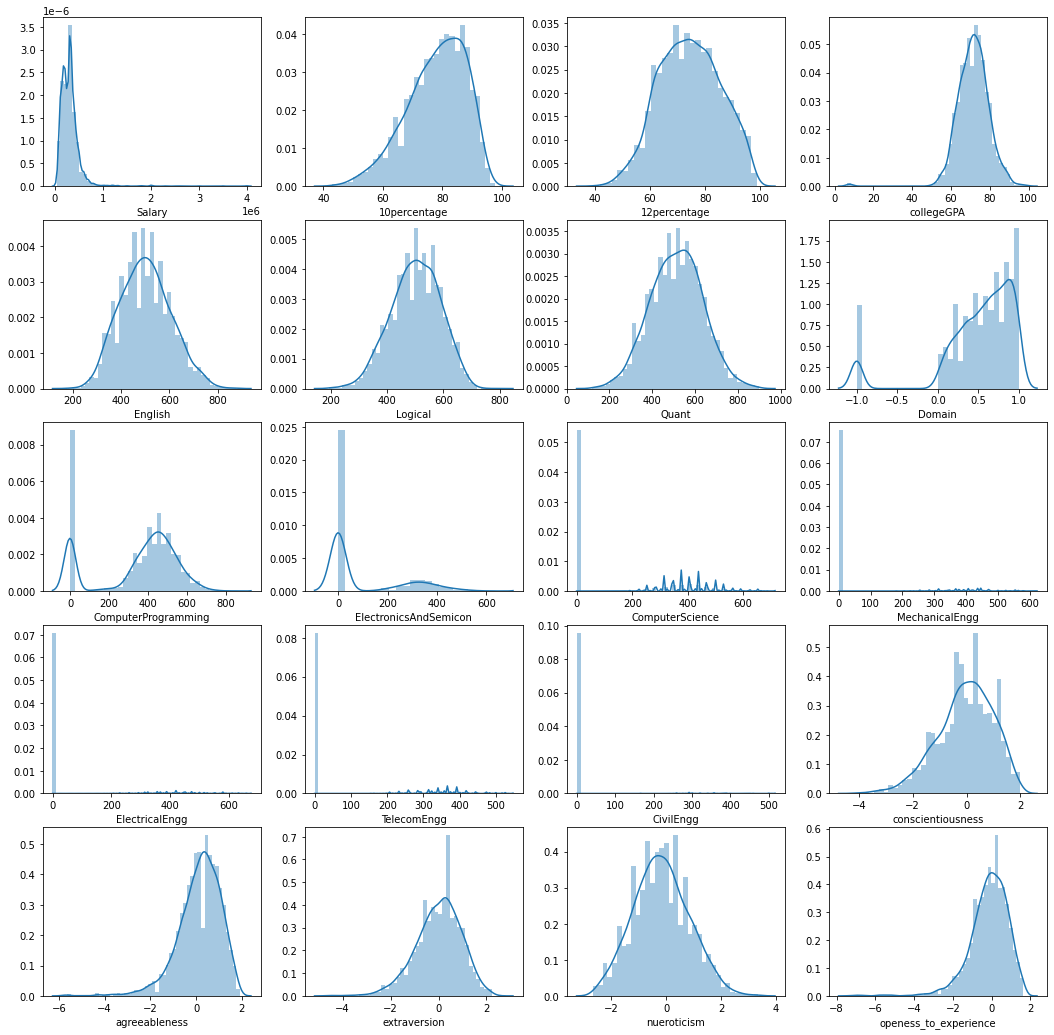

In [62]:
plt.figure(figsize=(18,18))
for i in range(len(df_num)):
  plt.subplot(5,4,i+1)
  sns.distplot(df[df_num[i]])

####Conclusion from Distplot:<br>
Features: ['ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg'] are **sparse** data.

In [63]:
#All Enginners who elected ComputerProgramming
CP= df.loc[df.ComputerProgramming!=-1]
CP.shape

(3130, 37)

In [64]:
#ALL Engineers who elected ElectronicsandSemicon
E_S= df.loc[df.ElectronicsAndSemicon !=-1]
E_S.shape

(1144, 37)

In [65]:
#All Enginners who elected Computer Science 
CS= df.loc[df.ComputerScience!=-1]
CS.shape

(902, 37)

In [66]:
#All Enginners who elected Mechanical Engineering 
ME= df.loc[df.MechanicalEngg!=-1]
ME.shape

(235, 37)

In [67]:
#All Enginners who elected Electrical Engineering 
EE= df.loc[df.ElectricalEngg!=-1]
EE.shape

(161, 37)

In [68]:
#All Enginners who elected Telecom Engineering 
TE= df.loc[df.TelecomEngg!=-1]
TE.shape

(374, 37)

In [69]:
#All Enginners who elected Civil Engineering 
CE= df.loc[df.MechanicalEngg!=-1]
CE.shape

(235, 37)

####Box-Plot

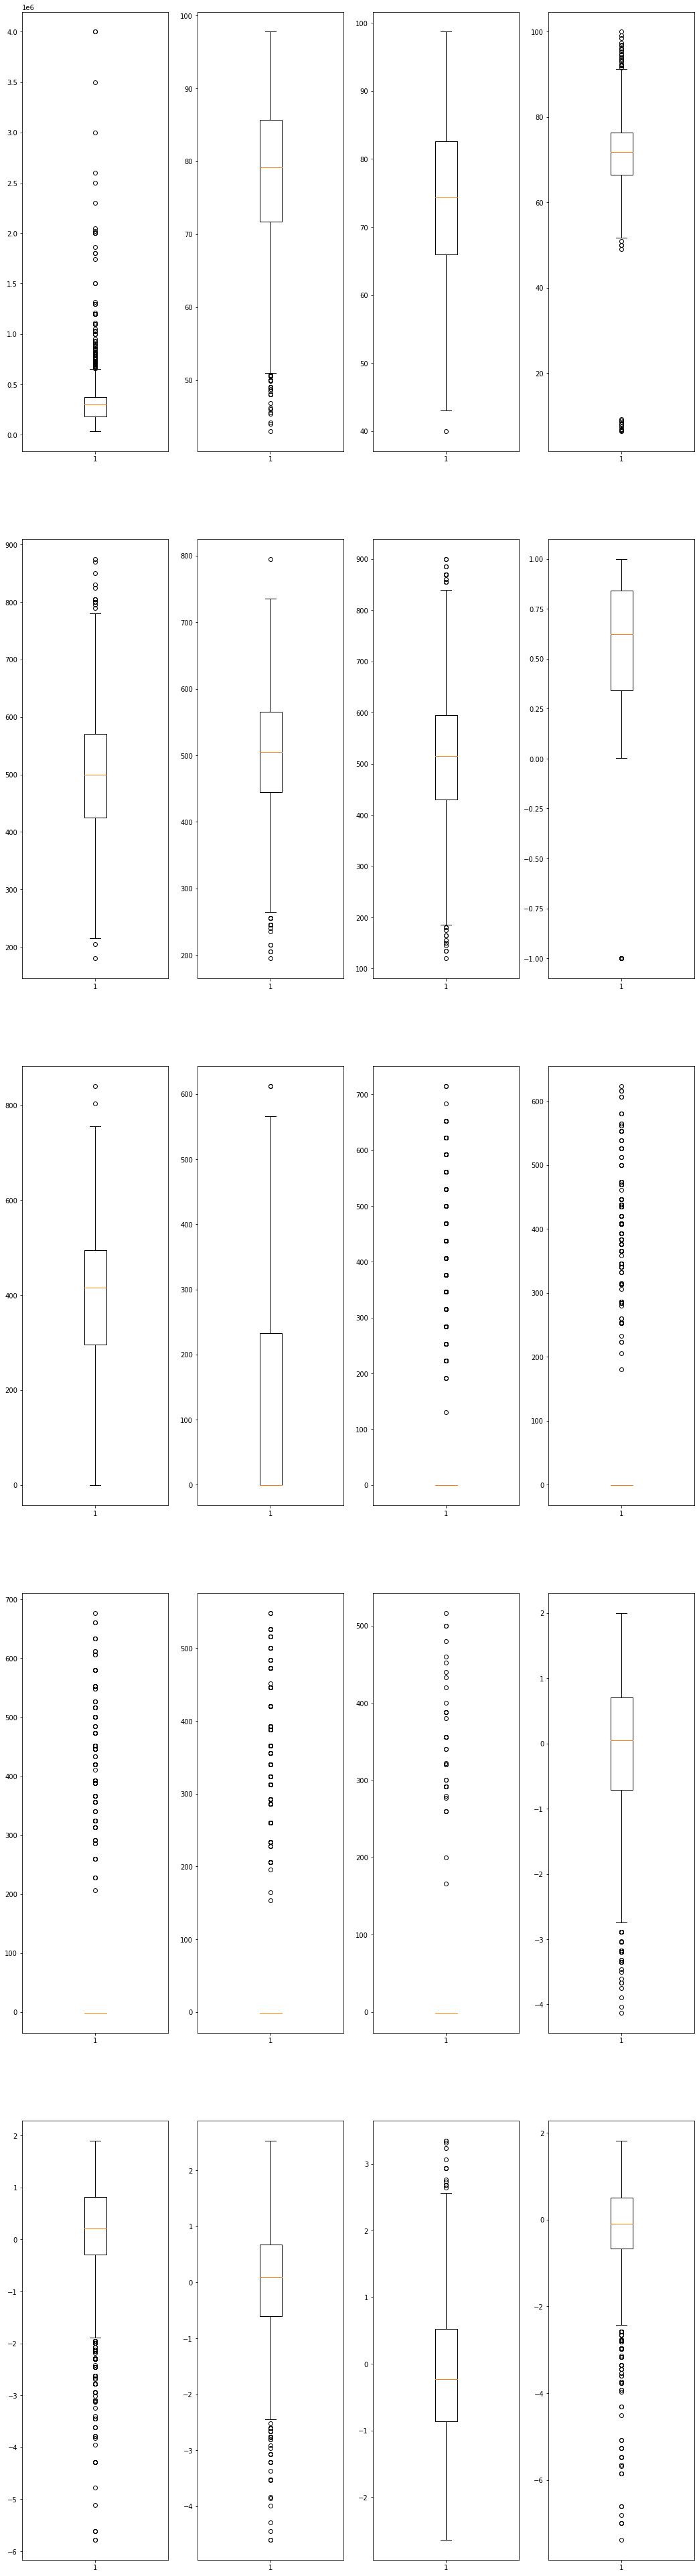

In [70]:
plt.figure(figsize=(18,70))
for i in range(len(df_num)):
  plt.subplot(5,4,i+1)
  plt.boxplot(df[df_num[i]])

#### Conclusions from Box plot:
Features have many outliers. Therefore, standardization/ Normalization must be used.

### Analyzing Categorical Data & changing as Categorical 
Categorical DataType Features: ['Designation','JobCity','Gender', 'CollegeTier', 'Degree','Specialization','CollegeCityTier','CollegeState']

In [71]:
df_cat =['Designation','JobCity','Gender', 'CollegeTier', 'Degree','Specialization','CollegeCityTier','CollegeState']

In [72]:
for i in df_cat:  
  df[i]=df[i].astype('category')

In [73]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
human resources analyst                1
human resource assistant               1
senior quality assurance engineer      1
hr executive                           1
windows systems administrator          1
Name: Designation, Length: 419, dtype: int64

Designation is **Nominal** feature

In [74]:
df['JobCity'].value_counts()

Bangalore                  627
-1                         461
Noida                      368
Hyderabad                  335
Pune                       290
                          ... 
New delhi                    1
Nellore                      1
Navi mumbai                  1
Navi Mumbai , Hyderabad      1
Mettur, Tamil Nadu           1
Name: JobCity, Length: 339, dtype: int64

-1 corresponds to NULL value here<br>
Job City is a **Nominal attribute**

In [75]:
df.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

Gender is a **Nominal** attribute

In [76]:
df.CollegeTier.value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

College Tier is an **ordinal** feature

In [77]:
df.Degree.value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

Degree is an **Nominal** attribute as we have 1 Bachelor degree and 3 types of Master degrees.

In [78]:
df.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

Specialization is **Nominal** feature

In [79]:
df.CollegeCityTier.value_counts()


0    2797
1    1201
Name: CollegeCityTier, dtype: int64

CollegeCityTier is **Ordinal** feature

In [80]:
df.CollegeState.value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Union Territory        5
Assam                  5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

College State is *Nominal* feature

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   category      
 4   JobCity                3998 non-null   category      
 5   Gender                 3998 non-null   category      
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeID              3998 non-null   int64         
 13  Col

##Bivariate Analysis

#### Analyzing Numerical Variables

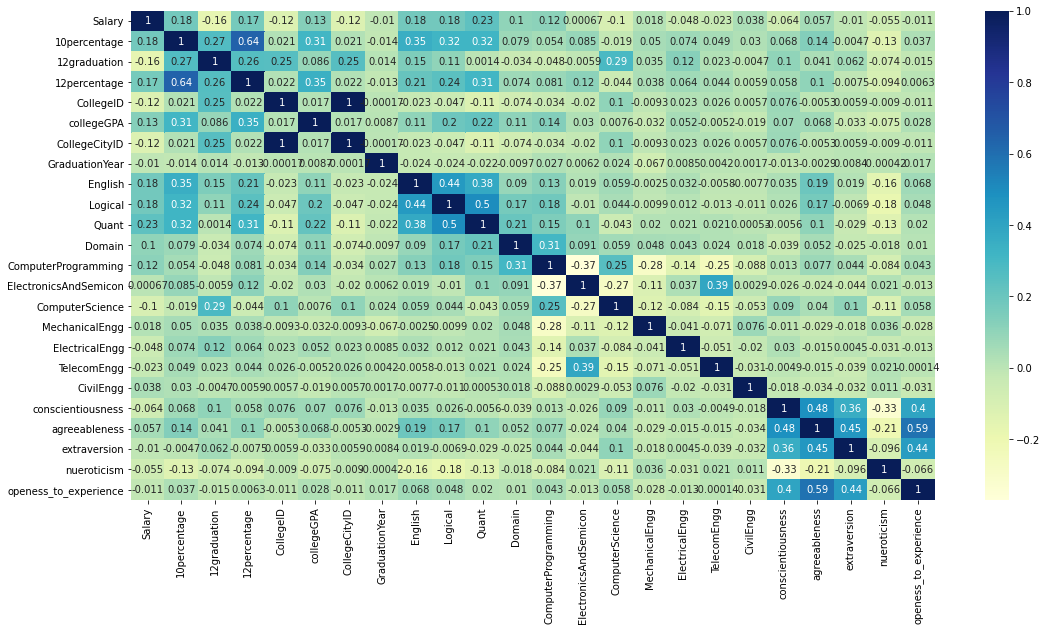

In [82]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [83]:
#Top Most correlated feature:
corr_matrix= df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

max_to_min_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                .stack()
                .sort_values(ascending=False))
print(max_to_min_corr)

CollegeID          CollegeCityID            1.000000
10percentage       12percentage             0.643378
agreeableness      openess_to_experience    0.591541
Logical            Quant                    0.500152
conscientiousness  agreeableness            0.481820
                                              ...   
Quant              CivilEngg                0.000528
GraduationYear     nueroticism              0.000417
CollegeID          GraduationYear           0.000172
CollegeCityID      GraduationYear           0.000172
TelecomEngg        openess_to_experience    0.000141
Length: 276, dtype: float64


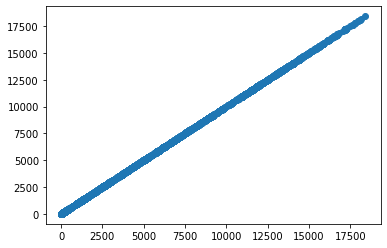

In [84]:
plt.scatter(df['CollegeID'],df['CollegeCityID'])

Perfect correlation with pearson coefficient =1 between CollegeID and CollegeCityID. We can say that both CollegeID amd CollegeCityID give **Redundant** **information**. We can remove one of the two features.<br> Say we drop CollegeCityID

In [85]:
df.drop('CollegeCityID',axis=1,inplace=True)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#####Scatter Plots for slightly correlated features

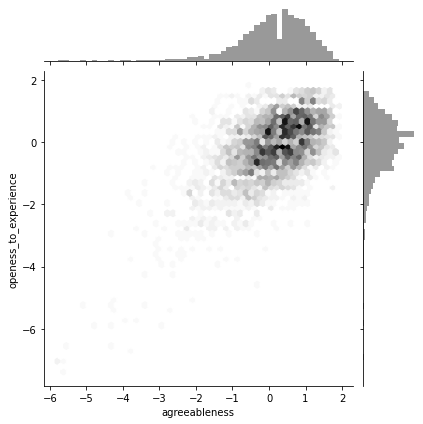

In [86]:
sns.jointplot(x='agreeableness',y='openess_to_experience',data=df,kind= 'hex',color='k')

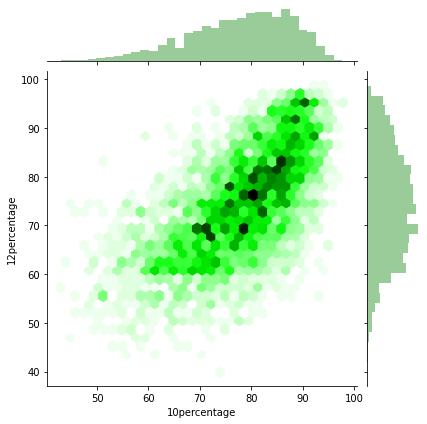

In [87]:
sns.jointplot(x='10percentage',y='12percentage',data=df,kind= 'hex',color='G')

Conclusion: Here an observation can be made that mostly a student sincere in 10th is usually also sincere in 12th and vice-versa. Hence scores have slight linear dependence.

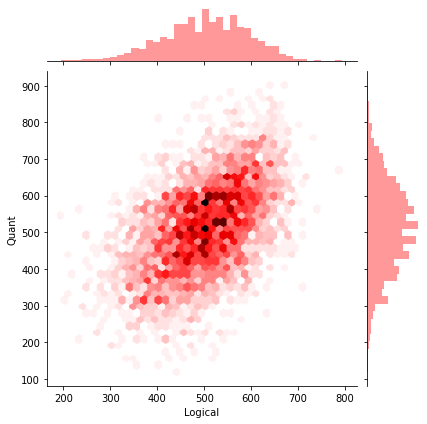

In [88]:
sns.jointplot(x='Logical',y='Quant',data=df,kind= 'hex',color='R')

###Analyzing Effects on Salary because of other variables

####Salary on the basis of Elective AMCAT subjects.

In [89]:
#Median Salary of Employee who elected Computer Programming
print(np.median(CP.Salary))

300000.0


In [90]:
#Median Salary of Employee who elected Electronics&Semicon
print(np.median(E_S.Salary))

300000.0


In [91]:
#Median Salary of Employee who elected Electrical Engineering
print(np.median(EE.Salary))

230000.0


In [92]:
#Median Salary of Employee who elected Computer Science
print(np.median(CS.Salary))

240000.0


In [93]:
#Median Salary of Employee who elected Mechanical Engineering
print(np.median(ME.Salary))

280000.0


In [94]:
#Median Salary of Employee who elected Civil Engineering
print(np.median(CE.Salary))

280000.0


In [95]:
#Median Salary of Employee who elected Telecom Engineering
print(np.median(TE.Salary))

290000.0


####Salary on the basis of their scores in AMCAT examination non-elective subjects

In [96]:
subjects= ['English', 'Logical', 'Quant','Domain','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

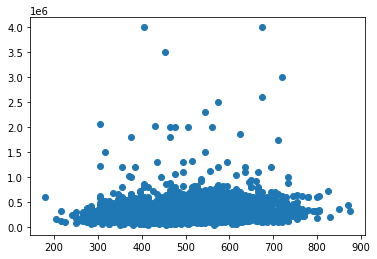

In [97]:
plt.scatter(data=df,x='English',y='Salary')

In [98]:
px.scatter(df,x='Logical',y='Salary',trendline='ols')

In [99]:

px.scatter(df,x='Quant',y='Salary',trendline='ols')

In [100]:
px.scatter(df,x='Domain',y='Salary',trendline='ols')

In [101]:

px.scatter(df,x='conscientiousness',y='Salary',trendline='ols')

In [102]:

px.scatter(df,x='agreeableness',y='Salary',trendline='ols')

In [103]:

px.scatter(df,x='extraversion',y='Salary',trendline='ols')

In [104]:

px.scatter(df,x='nueroticism',y='Salary',trendline='ols')

In [105]:

px.scatter(df,x='openess_to_experience',y='Salary',trendline='ols')

Conclusion: No Linear dependence of Salary on the AMCAT score. This may be observed because the Salary isn't normalized while the AMCAT scores in the subjects are normalized/standardized.

####Visualization

Observe Salaries of Engineers w.r.t their qualification Degrees

In [106]:
px.box(df,x='Degree',y='Salary')

Median Salaries w.r.t degrees:<br>
M.Tech/M.E > M.Sc. > B.Tech/B.E. > MCA

Observe Salaries of Engineers w.r.t their Job Designations

In [107]:
px.pie(df,values='Salary',names='Designation')

Conclusion: Highest cumulative paid job is that of a Software Engineer

Observe Salaries of Engineers w.r.t the Job City

In [108]:
px.pie(df,names='JobCity',values='Salary')

Conclusion: Highest Cumulative Salary is for employees in Banglore

Observe Salaries of Engineers w.r.t their College's Tier :

In [109]:
px.box(df,x='CollegeTier',y='Salary')

Conclusion: Median Salary of an engineer from Tier1 college is almost 60,000 more than that of an engineer from Tier2 college.

Observe Salaries of Engineers w.r.t their College's City Tier

In [110]:
px.box(df,x='CollegeCityTier',y='Salary')

Conclusion: College City Tier doesn't affect the median salary of an engineer.

Observe Salaries of Engineers w.r.t their Gender

In [111]:
px.box(df,x='Gender',y='Salary')

Conclusion: Median salary of Employees is same. There's an unbiased salary for females and Males.

#Feature Transformation

###Numerical Features

In [112]:
#df_num : stores all numerical features
print(df_num)


['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [113]:
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(df[df_num])
df[df_num]=pd.DataFrame(std_data,columns=df_num)

In [114]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0.527947,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,0.647233,"board ofsecondary education,ap",2007,1.939676,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,0.797646,0,Andhra Pradesh,2011,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966
1,0.904045,2013-09-01,present,assistant manager,Indore,m,1989-10-04,0.758921,cbse,2007,0.957729,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,-0.174641,0,Madhya Pradesh,2012,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910
2,0.081332,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,0.718307,cbse,2010,-0.569744,cbse,64,2,B.Tech/B.E.,information technology,-0.181988,0,Uttar Pradesh,2014,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821
3,3.724775,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,0.779227,cbse,2007,0.830439,cbse,6920,1,B.Tech/B.E.,computer engineering,0.386200,1,Delhi,2011,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.506320,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,0.007570,cbse,2008,0.212176,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,0.295584,0,Uttar Pradesh,2012,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542


### Categorical Features

In [115]:
#df_cat: stores the categorical features

In [116]:
print(df_cat)

['Designation', 'JobCity', 'Gender', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier', 'CollegeState']


In [117]:
for i in df_cat:
  print(i,end=':')
  print(df[i].nunique(),end='\n')

Designation:419
JobCity:339
Gender:2
CollegeTier:2
Degree:4
Specialization:46
CollegeCityTier:2
CollegeState:26


In [118]:
!pip install category_encoders

Binary Classes: Gender,CollegeTier,CollegeCityTier

In [119]:
bin_df=['Gender','CollegeTier','CollegeCityTier']

In [120]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=bin_df)

In [121]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0.527947,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,0.647233,"board ofsecondary education,ap",2007,1.939676,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,0.797646,0,Andhra Pradesh,2011,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966
1,0.904045,2013-09-01,present,assistant manager,Indore,m,1989-10-04,0.758921,cbse,2007,0.957729,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,-0.174641,0,Madhya Pradesh,2012,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910
2,0.081332,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,0.718307,cbse,2010,-0.569744,cbse,64,2,B.Tech/B.E.,information technology,-0.181988,0,Uttar Pradesh,2014,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821
3,3.724775,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,0.779227,cbse,2007,0.830439,cbse,6920,1,B.Tech/B.E.,computer engineering,0.386200,1,Delhi,2011,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.506320,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,0.007570,cbse,2008,0.212176,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,0.295584,0,Uttar Pradesh,2012,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542


In [122]:
df_bin = encoder.fit_transform(df)
df_bin.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender_0,Gender_1,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier_0,CollegeTier_1,Degree,Specialization,collegeGPA,CollegeCityTier_0,CollegeCityTier_1,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0.527947,2012-06-01,present,senior quality engineer,Bangalore,0,1,1990-02-19,0.647233,"board ofsecondary education,ap",2007,1.939676,"board of intermediate education,ap",1141,0,1,B.Tech/B.E.,computer engineering,0.797646,0,1,Andhra Pradesh,2011,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966
1,0.904045,2013-09-01,present,assistant manager,Indore,1,0,1989-10-04,0.758921,cbse,2007,0.957729,cbse,5807,0,1,B.Tech/B.E.,electronics and communication engineering,-0.174641,0,1,Madhya Pradesh,2012,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910
2,0.081332,2014-06-01,present,systems engineer,Chennai,0,1,1992-08-03,0.718307,cbse,2010,-0.569744,cbse,64,0,1,B.Tech/B.E.,information technology,-0.181988,0,1,Uttar Pradesh,2014,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821
3,3.724775,2011-07-01,present,senior software engineer,Gurgaon,1,0,1989-12-05,0.779227,cbse,2007,0.830439,cbse,6920,1,0,B.Tech/B.E.,computer engineering,0.386200,1,0,Delhi,2011,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.506320,2014-03-01,2015-03-01 00:00:00,get,Manesar,1,0,1991-02-27,0.007570,cbse,2008,0.212176,cbse,11368,0,1,B.Tech/B.E.,electronics and communication engineering,0.295584,0,1,Uttar Pradesh,2012,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542


In [123]:
#multi-class categorical features
multi_cat_df= ['Designation', 'JobCity', 'Degree', 'Specialization','CollegeState']

In [124]:
df_dum= pd.get_dummies(df[multi_cat_df], columns=multi_cat_df,sparse=True, drop_first=True)
print(df_dum.head())

   Designation_.net web developer  ...  CollegeState_West Bengal
0                               0  ...                         0
1                               0  ...                         0
2                               0  ...                         0
3                               0  ...                         0
4                               0  ...                         0

[5 rows x 829 columns]


Concatenating the coded categorical columns with data frame and dropping the original categorical columns

In [125]:
df2= pd.concat((df_bin,df_dum),axis=1)

In [126]:
df2=df2.drop(multi_cat_df,axis=1)

In [127]:
df2.head()

,Salary,DOJ,DOL,Gender_0,Gender_1,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier_0,CollegeTier_1,collegeGPA,CollegeCityTier_0,CollegeCityTier_1,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_admin assistant,Designation_administrative coordinator,Designation_administrative support,...,Specialization_information science,Specialization_information science engineering,Specialization_information technology,Specialization_instrumentation and control engineering,Specialization_instrumentation engineering,Specialization_internal combustion engine,Specialization_mechanical & production engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_mechatronics,Specialization_metallurgical engineering,Specialization_other,Specialization_polymer technology,Specialization_power systems and automation,Specialization_telecommunication engineering,CollegeState_Assam,CollegeState_Bihar,CollegeState_Chhattisgarh,CollegeState_Delhi,CollegeState_Goa,CollegeState_Gujarat,CollegeState_Haryana,CollegeState_Himachal Pradesh,CollegeState_Jammu and Kashmir,CollegeState_Jharkhand,CollegeState_Karnataka,CollegeState_Kerala,CollegeState_Madhya Pradesh,CollegeState_Maharashtra,CollegeState_Meghalaya,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,0.527947,2012-06-01,present,0,1,1990-02-19,0.647233,"board ofsecondary education,ap",2007,1.939676,"board of intermediate education,ap",1141,0,1,0.797646,0,1,2011,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.904045,2013-09-01,present,1,0,1989-10-04,0.758921,cbse,2007,0.957729,cbse,5807,0,1,-0.174641,0,1,2012,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.081332,2014-06-01,present,0,1,1992-08-03,0.718307,cbse,2010,-0.569744,cbse,64,0,1,-0.181988,0,1,2014,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.724775,2011-07-01,present,1,0,1989-12-05,0.779227,cbse,2007,0.830439,cbse,6920,1,0,0.386200,1,0,2011,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.506320,2014-03-01,2015-03-01 00:00:00,1,0,1991-02-27,0.007570,cbse,2008,0.212176,cbse,11368,0,1,0.295584,0,1,2012,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [128]:
df2.columns

Index(['Salary', 'DOJ', 'DOL', 'Gender_0', 'Gender_1', 'DOB', '10percentage',
       '10board', '12graduation', '12percentage',
       ...
       'CollegeState_Orissa', 'CollegeState_Punjab', 'CollegeState_Rajasthan',
       'CollegeState_Sikkim', 'CollegeState_Tamil Nadu',
       'CollegeState_Telangana', 'CollegeState_Union Territory',
       'CollegeState_Uttar Pradesh', 'CollegeState_Uttarakhand',
       'CollegeState_West Bengal'],
      dtype='object', length=863)

**Note: Here we can reduce the number of columns as we have 2 Ordinal categorical attributes:  CollegeTier, CollegeCityTier** 

In [129]:
#For CollegeTier we can drop CollegeTier_1 column so as the Colleges rank in order.
#Here: Tier1->1,Tier2->0
df2.drop('CollegeTier_1',axis=1,inplace=True)

In [130]:
df2.head()

,Salary,DOJ,DOL,Gender_0,Gender_1,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier_0,collegeGPA,CollegeCityTier_0,CollegeCityTier_1,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_admin assistant,Designation_administrative coordinator,Designation_administrative support,Designation_aircraft technician,...,Specialization_information science,Specialization_information science engineering,Specialization_information technology,Specialization_instrumentation and control engineering,Specialization_instrumentation engineering,Specialization_internal combustion engine,Specialization_mechanical & production engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_mechatronics,Specialization_metallurgical engineering,Specialization_other,Specialization_polymer technology,Specialization_power systems and automation,Specialization_telecommunication engineering,CollegeState_Assam,CollegeState_Bihar,CollegeState_Chhattisgarh,CollegeState_Delhi,CollegeState_Goa,CollegeState_Gujarat,CollegeState_Haryana,CollegeState_Himachal Pradesh,CollegeState_Jammu and Kashmir,CollegeState_Jharkhand,CollegeState_Karnataka,CollegeState_Kerala,CollegeState_Madhya Pradesh,CollegeState_Maharashtra,CollegeState_Meghalaya,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,0.527947,2012-06-01,present,0,1,1990-02-19,0.647233,"board ofsecondary education,ap",2007,1.939676,"board of intermediate education,ap",1141,0,0.797646,0,1,2011,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.904045,2013-09-01,present,1,0,1989-10-04,0.758921,cbse,2007,0.957729,cbse,5807,0,-0.174641,0,1,2012,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.081332,2014-06-01,present,0,1,1992-08-03,0.718307,cbse,2010,-0.569744,cbse,64,0,-0.181988,0,1,2014,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.724775,2011-07-01,present,1,0,1989-12-05,0.779227,cbse,2007,0.830439,cbse,6920,1,0.386200,1,0,2011,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.506320,2014-03-01,2015-03-01 00:00:00,1,0,1991-02-27,0.007570,cbse,2008,0.212176,cbse,11368,0,0.295584,0,1,2012,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [131]:
#For CollegeCityTier we can drop CollegeCityTier_0 column so as the Cities rank in order.
#Here: Tier1->0,Tier0->1
df2.drop('CollegeCityTier_0',axis=1,inplace=True)

In [132]:
df2.head()

,Salary,DOJ,DOL,Gender_0,Gender_1,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier_0,collegeGPA,CollegeCityTier_1,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_admin assistant,Designation_administrative coordinator,Designation_administrative support,Designation_aircraft technician,Designation_android developer,...,Specialization_information science,Specialization_information science engineering,Specialization_information technology,Specialization_instrumentation and control engineering,Specialization_instrumentation engineering,Specialization_internal combustion engine,Specialization_mechanical & production engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_mechatronics,Specialization_metallurgical engineering,Specialization_other,Specialization_polymer technology,Specialization_power systems and automation,Specialization_telecommunication engineering,CollegeState_Assam,CollegeState_Bihar,CollegeState_Chhattisgarh,CollegeState_Delhi,CollegeState_Goa,CollegeState_Gujarat,CollegeState_Haryana,CollegeState_Himachal Pradesh,CollegeState_Jammu and Kashmir,CollegeState_Jharkhand,CollegeState_Karnataka,CollegeState_Kerala,CollegeState_Madhya Pradesh,CollegeState_Maharashtra,CollegeState_Meghalaya,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,0.527947,2012-06-01,present,0,1,1990-02-19,0.647233,"board ofsecondary education,ap",2007,1.939676,"board of intermediate education,ap",1141,0,0.797646,1,2011,0.127240,0.961148,0.095037,0.267789,0.447559,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.904045,2013-09-01,present,1,0,1989-10-04,0.758921,cbse,2007,0.957729,cbse,5807,0,-0.174641,1,2012,1.842720,1.249258,2.180295,0.960524,-1.724556,2.342739,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.081332,2014-06-01,present,0,1,1992-08-03,0.718307,cbse,2010,-0.569744,cbse,64,0,-0.181988,1,2014,1.080285,0.500173,-1.172473,-0.127212,0.204048,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3.724775,2011-07-01,present,1,0,1989-12-05,0.779227,cbse,2007,0.830439,cbse,6920,1,0.386200,0,2011,1.270894,0.961148,0.912785,0.989957,1.275495,-0.608820,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.506320,2014-03-01,2015-03-01 00:00:00,1,0,1991-02-27,0.007570,cbse,2008,0.212176,cbse,11368,0,0.295584,1,2012,0.413154,1.422124,-0.395612,-0.823681,-1.724556,0.870120,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
